In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 10 #

## Simple Lists

In [2]:
[1, 5, 9]

[1, 5, 9]

In [3]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

## Lists

In [4]:
simple_list = ['hello', 7, 3.14, True]
simple_list

['hello', 7, 3.14, True]

In [5]:
my_array = make_array(1, 2, 3)

crowded_list = [my_array, 'what is going on', -10]
crowded_list

[array([1, 2, 3]), 'what is going on', -10]

In [6]:
Table().with_columns('Numbers', [1, 2, 3])

Numbers
1
2
3


In [7]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [8]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Cross-classification: grouping by two columns

In [ ]:
survey.group(['intro_extra','gender']).show()

## Pivot Tables

In [ ]:
survey.pivot('intro_extra','gender')

In [ ]:
survey.pivot('intro_extra','gender', values='sleep', collect=np.average)

In [ ]:
survey.group('gender', np.average)

## Challenge Question ##

In [16]:
sky = Table.read_table('skyscrapers_v2.csv')
sky = (sky.with_column('age', 2020 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,6
Willis Tower,steel,Chicago,442.14,46
432 Park Avenue,concrete,New York City,425.5,5


In [17]:
# 1. For each city, what’s the tallest building for each material?










In [18]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?












Don't read ahead until you try the challenge questions yourself first!

In [19]:
sky.select('material', 'city', 'height').group(['city', 'material'], collect=max)

city,material,height max
Atlanta,concrete,264.25
Atlanta,mixed/composite,311.8
Atlanta,steel,169.47
Austin,concrete,208.15
Austin,steel,93.6
Baltimore,concrete,161.24
Baltimore,steel,155.15
Boston,concrete,121.92
Boston,mixed/composite,139
Boston,steel,240.79


In [20]:
sky_p = sky.pivot('material', 'city', values='height', collect=max)
sky_p.show()

city,concrete,mixed/composite,steel
Atlanta,264.25,311.8,169.47
Austin,208.15,0,93.6
Baltimore,161.24,0,155.15
Boston,121.92,139,240.79
Charlotte,265.48,239.7,179.23
Chicago,423.22,306.94,442.14
Cincinnati,125,202.69,175
Cleveland,125,288.65,215.8
Columbus,79.25,0,169.3
Dallas,176.48,280.72,270.06


In [21]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p

city,concrete,mixed/composite,steel,difference
Atlanta,264.25,311.8,169.47,94.78
Austin,208.15,0,93.6,114.55
Baltimore,161.24,0,155.15,6.09001
Boston,121.92,139,240.79,118.87
Charlotte,265.48,239.7,179.23,86.25
Chicago,423.22,306.94,442.14,18.92
Cincinnati,125,202.69,175,50
Cleveland,125,288.65,215.8,90.8
Columbus,79.25,0,169.3,90.05
Dallas,176.48,280.72,270.06,93.58


In [22]:
sky_p.sort('difference', True)

city,concrete,mixed/composite,steel,difference
Sunny Isles Beach,196,0,0,196
Las Vegas,350.22,195.68,164.6,185.62
Miami Beach,170.39,0,0,170.39
Pittsburgh,89.3,172,256.34,167.04
Los Angeles,145.7,118.26,310.29,164.59
Philadelphia,157.89,296.73,288.04,130.15
Boston,121.92,139,240.79,118.87
Austin,208.15,0,93.6,114.55
Seattle,138.69,284.38,235.31,96.62
Atlanta,264.25,311.8,169.47,94.78


### Challenge II: try it here!

In [23]:
# Generate a table of the names of the oldest buildings for each 
# material for each city:



## Joins ##

In [24]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [25]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [26]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


In [27]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


In [28]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25


## Meteorites

Let's look at a dataset with information about various meteorites.  We can again practice some exploratory data analysis to understand what's out there.

In [3]:
meteorites = Table.read_table('meteorites_na.csv')
meteorites

name,class,mass,how,year,lat,lon
Abee,EH4,107000,Fell,1952,54.2167,-113
Acapulco,Acapulcoite,1914,Fell,1976,16.8833,-99.9
Allegan,H5,32000,Fell,1899,42.5333,-85.8833
Allende,CV3,2e+06,Fell,1969,26.9667,-105.317
Andover,L6,3200,Fell,1898,44.6167,-70.75
Archie,H6,5070,Fell,1932,38.5,-94.3
Ash Creek,L6,9500,Fell,2009,31.805,-97.01
Atemajac,L6,94.2,Fell,1896,20.0667,-103.667
Athens,LL6,265,Fell,1933,34.75,-87
Atoka,L6,1384.2,Fell,1945,34.3167,-96.15


In [4]:
meteorites.group('class').sort('count', descending=True)

class,count
H5,293
L6,278
H4,186
L5,136
H6,132
"Iron, IIIAB",124
L4,53
OC,43
"Iron, IIAB",42
"Iron, IAB-MG",37


In [5]:
meteorites.group('how')

how,count
Fell,181
Found,1626


In [6]:
meteorites.group('how', np.average)

how,name average,class average,mass average,year average,lat average,lon average
Fell,,,38316.9,1926.62,37.2264,-93.3681
Found,,,132638,1958.22,36.206,-103.928


/Users/peterjantsch/anaconda3/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


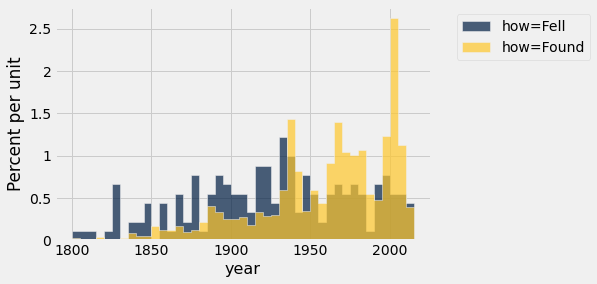

In [7]:
meteorites.hist('year', bins=np.arange(1800, 2020, 5), group='how')

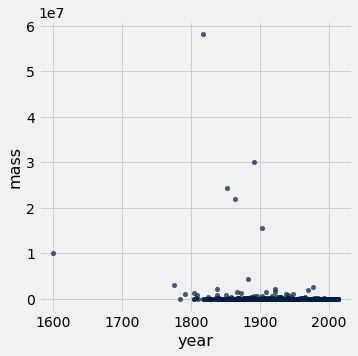

In [8]:
meteorites.scatter('year', 'mass')

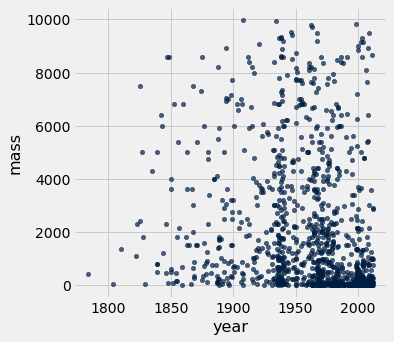

In [9]:
meteorites.where('mass', are.below(10000)).scatter('year', 'mass')

In [10]:
new_fell = meteorites.where('how', 'Fell').where('year', are.above(1950))
new_found  = meteorites.where('how', 'Found').where('year', are.above(1950))
new_found

name,class,mass,how,year,lat,lon
Abajo,H5,331,Found,1982,26.8,-105.417
Abbott,H3-6,21100,Found,1951,36.3,-104.283
Ackerly,L5,3046,Found,1995,32.5903,-101.772
Acomita,"Pallasite, PMG",3956,Found,1962,35.05,-107.567
Acuña,"Iron, IIIAB",217700,Found,1981,29.3167,-100.967
Akron (1961),L6,4000,Found,1961,40.15,-103.167
Albion,"Iron, IVA",12280,Found,1966,46.8333,-117.25
Aldama (a),"Iron, IIIAB",11000,Found,1985,28.8333,-105.867
Aldama (b),H5,66.5,Found,1996,25.05,-106
Alkali,H6,30.47,Found,1998,37.8667,-117.4
